Input:
<img src="shujatali.jpg" width="400" height="200">

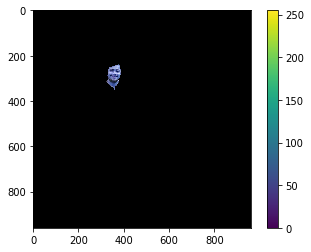

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('shujatali.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# The real important part is the rect we define. This is rect = (start_x, start_y, width, height).
rect = (310,210,150,150) 

"""
we used cv2.grabCut, which took quite a few parameters.
First the input image, then the mask, then the rectangle for our main object, the background model,
foreground model, the amount of iterations to run, and what mode you are using
"""
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT
"""
The mask is changed so that all 0 and 2 pixels are converted to the background, where the 1 and 3 pixels are now the foreground. 
From here, we multiply with the input image, and we get our final result:
"""            
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()